In [1]:
#importing libraries
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

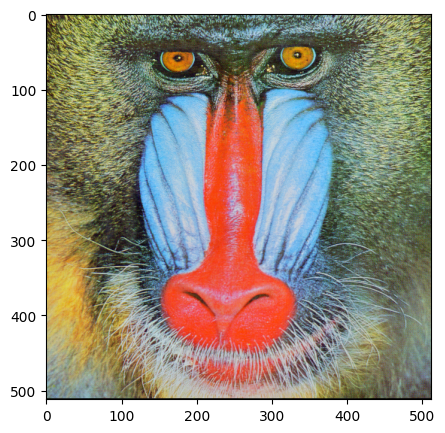

In [3]:
#copy for the original image to another variable
baboon = np.array(Image.open('resources/baboon.png'))
plt.figure(figsize=(5,5))
plt.imshow(baboon )
plt.show()

In [4]:
A = baboon
id(A) == id(baboon)

True

In [6]:
B = baboon.copy() #copy so different address
id(B) == id(baboon)

False

In [7]:
baboon[:,:,] = 0 #set all values to 0

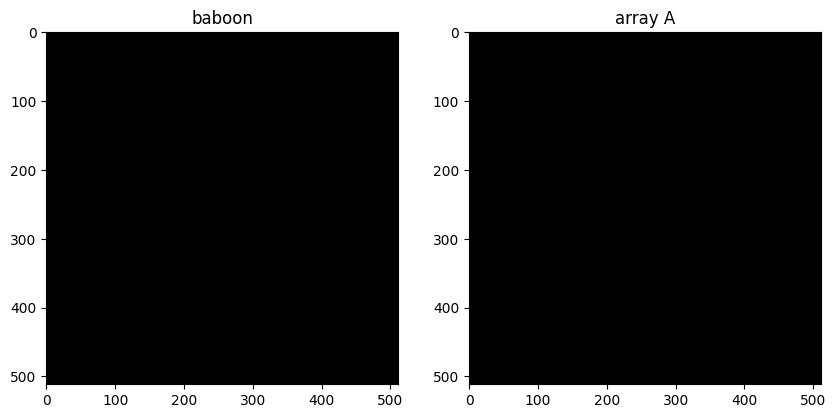

In [8]:
#comparing baboon and A 
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(baboon)
plt.title("baboon")
plt.subplot(122)
plt.imshow(A)
plt.title("array A")
plt.show()

In [9]:
#same plots because they are the same array rerferenced by different variables

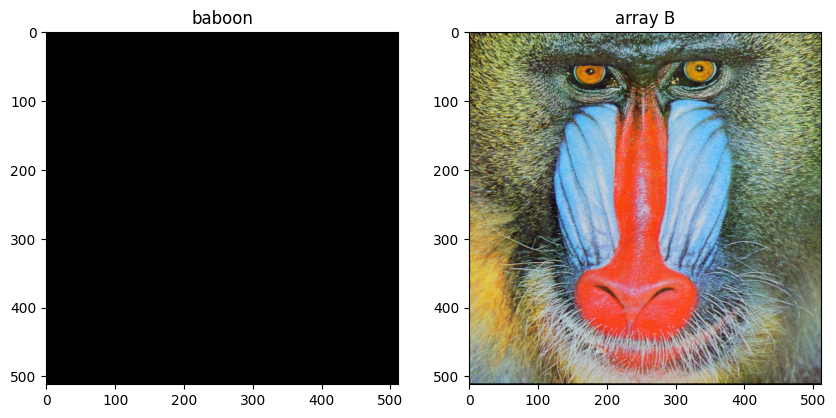

In [10]:
#comparing baboon and B
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(baboon)
plt.title("baboon")
plt.subplot(122)
plt.imshow(B)
plt.title("array B")
plt.show()

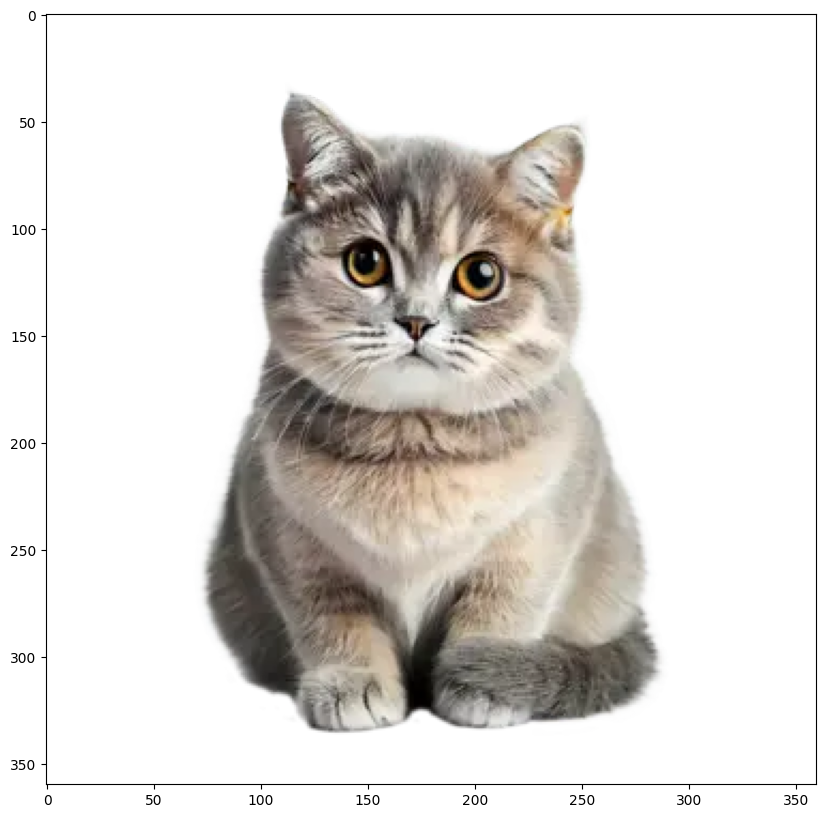

In [11]:
#flipping images
image = Image.open("resources/cat.png")
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.show()

In [12]:
#casting to an array and finding shape
array  = np.array(image)
width, height, channels = array.shape
print('width, height, channels = ', width, height, channels)

width, height, channels =  360 360 4


In [13]:
#flipping image with np.uint8
array_flip = np.zeros((width, height, channels), dtype=np.uint8)

In [14]:
for i, row in enumerate(array):
    array_flip[width - 1 -i, :, :] = row

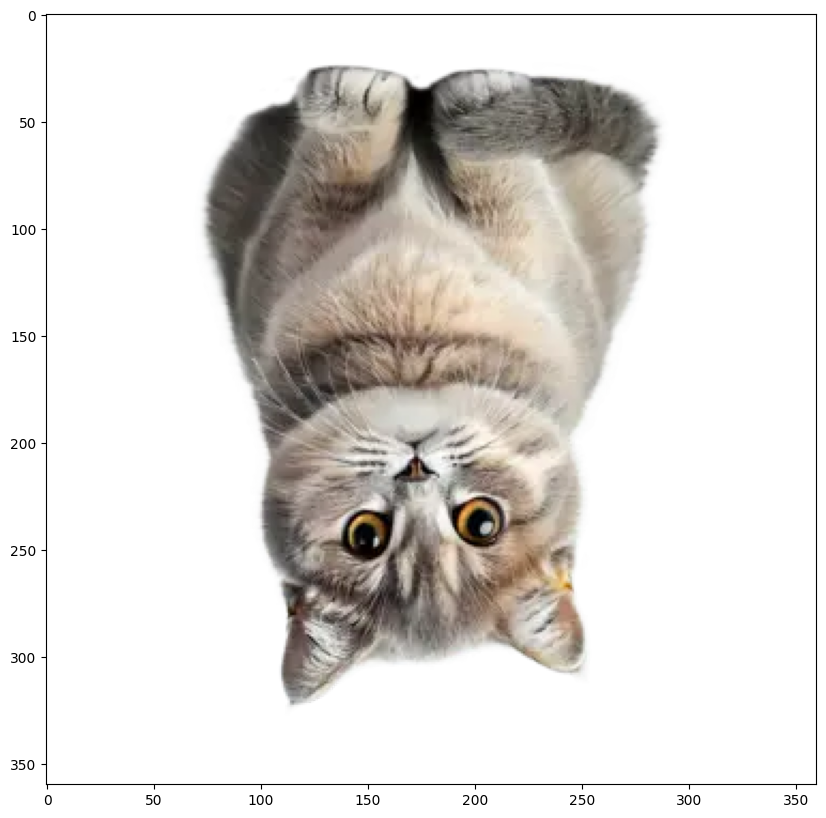

In [15]:
from PIL import ImageOps
image_flip = ImageOps.flip(image)
plt.figure(figsize=(10,10))
plt.imshow(image_flip)
plt.show()

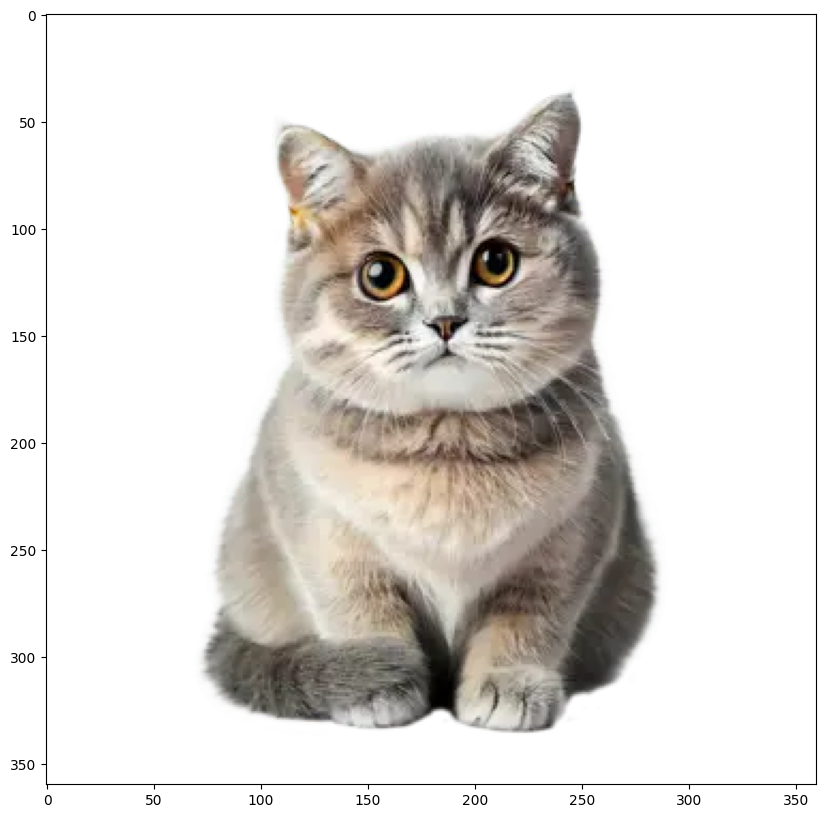

In [16]:
im_mirror = ImageOps.mirror(image)
plt.figure(figsize=(10,10))
plt.imshow(im_mirror)
plt.show()

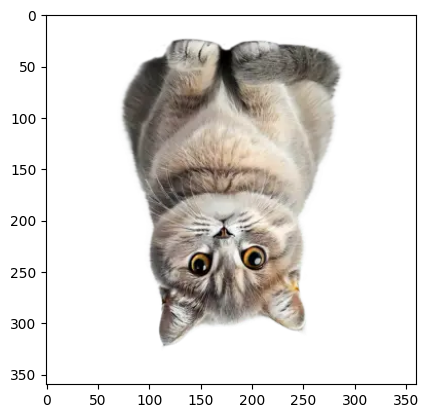

In [17]:
im_flip = image.transpose(1) #we can use transpose to flip the image and parameter 1 is for vertical flip
plt.imshow(im_flip)
plt.show()

In [18]:
#dict for flipping for the Image module
flip = {"FLIP_LEFT_RIGHT":Image.FLIP_LEFT_RIGHT,
        "FLIP_TOP_BOTTOM":Image.FLIP_TOP_BOTTOM,
        "ROTATE_90":Image.ROTATE_90,
        "ROTATE_180":Image.ROTATE_180,
        "ROTATE_270":Image.ROTATE_270,
        "TRANSPOSE":Image.TRANSPOSE,
        "TRANSVERSE":Image.TRANSVERSE}

In [20]:
flip["FLIP_LEFT_RIGHT"]

0

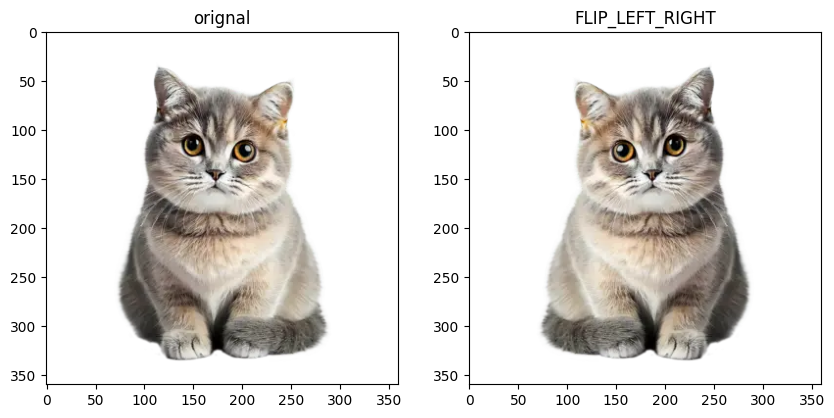

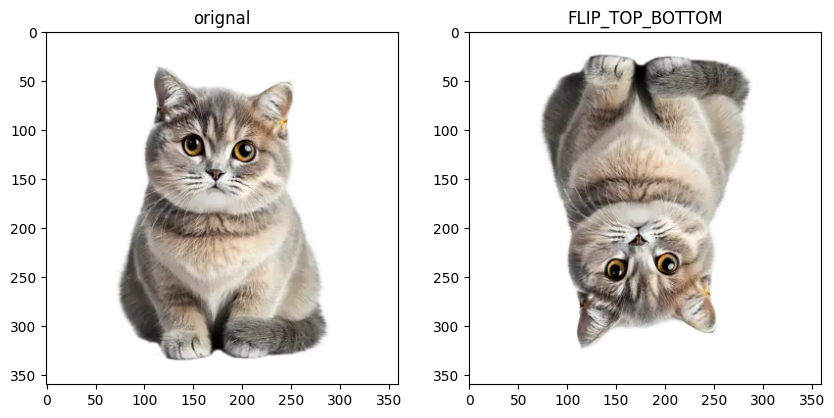

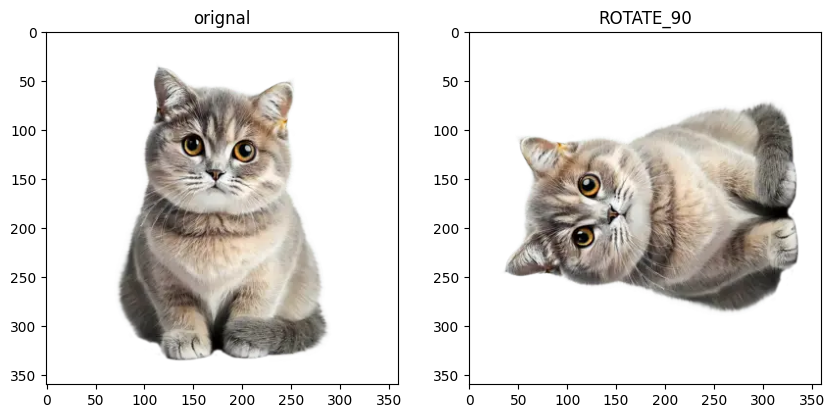

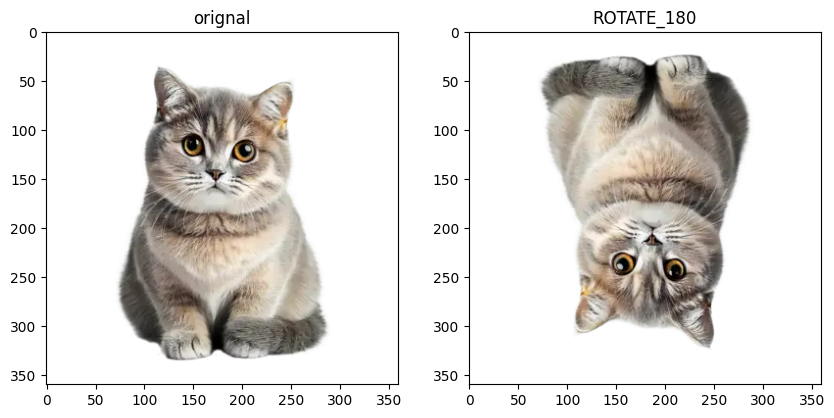

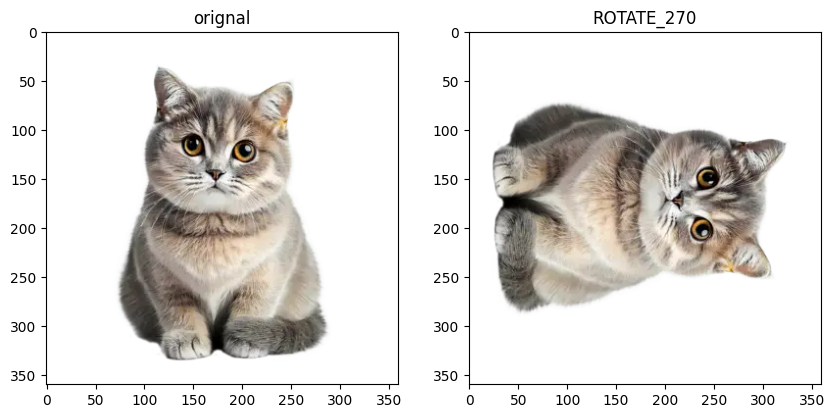

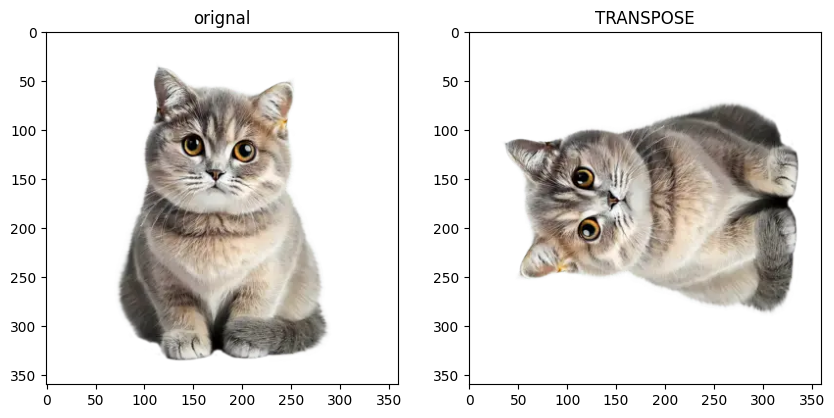

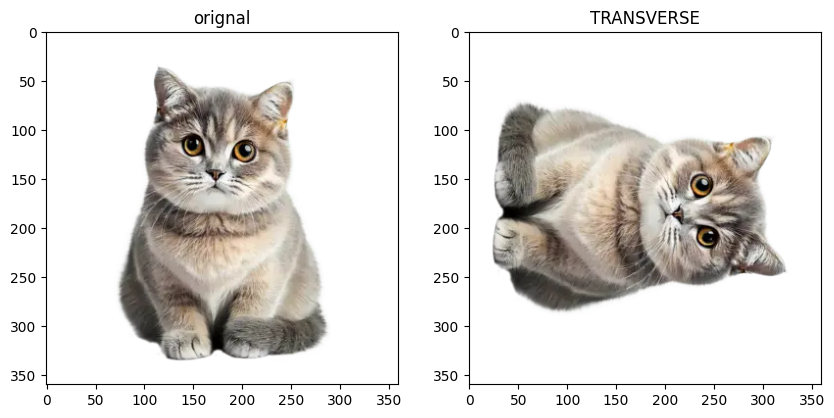

In [21]:
for key, values in flip.items():
    plt.figure(figsize=(10,10))
    plt.subplot(1,2,1)
    plt.imshow(image)
    plt.title("orignal")
    plt.subplot(1,2,2)
    plt.imshow(image.transpose(values))
    plt.title(key)
    plt.show()

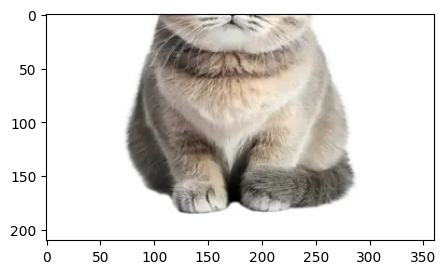

In [22]:
#cropping images
upper = 150
lower = 400
crop_top = array[upper: lower, :, :]
plt.figure(figsize=(5,5))
plt.imshow(crop_top)
plt.show()

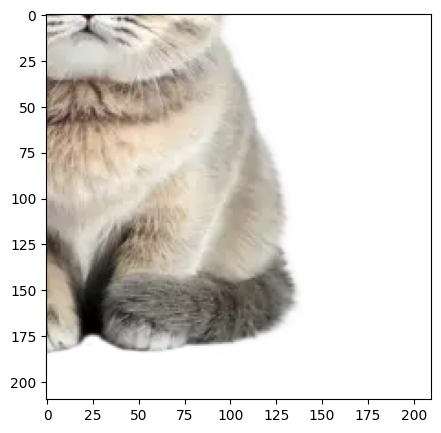

In [23]:
left = 150
right = 400
crop_horizontal = crop_top[:, left:right, :]
plt.figure(figsize=(5,5))
plt.imshow(crop_horizontal)
plt.show()

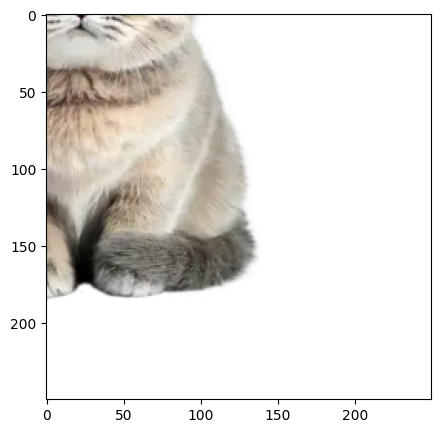

In [25]:
#cropping with PIL
image = Image.open("resources/cat.png")
crop_image = image.crop((left, upper, right, lower))
plt.figure(figsize=(5,5))
plt.imshow(crop_image)
plt.show()

ValueError: Could not save to JPEG for display

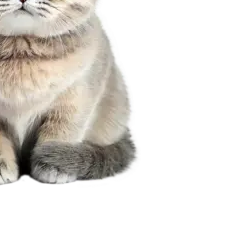

In [27]:
crop_image = crop_image.transpose(Image.FLIP_LEFT_RIGHT)
crop_image

In [28]:
#changing specific image pixels using array indexing 
array_sq = np.copy(array)
array_sq[upper:lower, left:right, 1:2] = 0

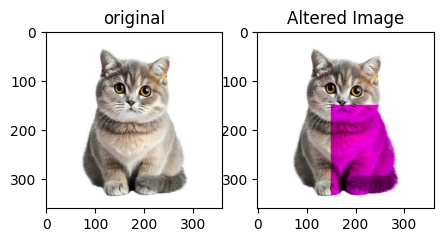

In [29]:
#comparing new images
plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
plt.imshow(array)
plt.title("original")
plt.subplot(1,2,2)
plt.imshow(array_sq)
plt.title("Altered Image")
plt.show()


In [31]:
#imagedraw module from PIL provides 2D graphics
from PIL import ImageDraw
image_draw = image.copy()
#draw image using draw constructor
image_fn  = ImageDraw.Draw(im = image_draw)

In [32]:
#whatever we draw will be on the image_draw
shape = [left, upper,right, lower]
image_fn.rectangle(xy=shape, fill="red")

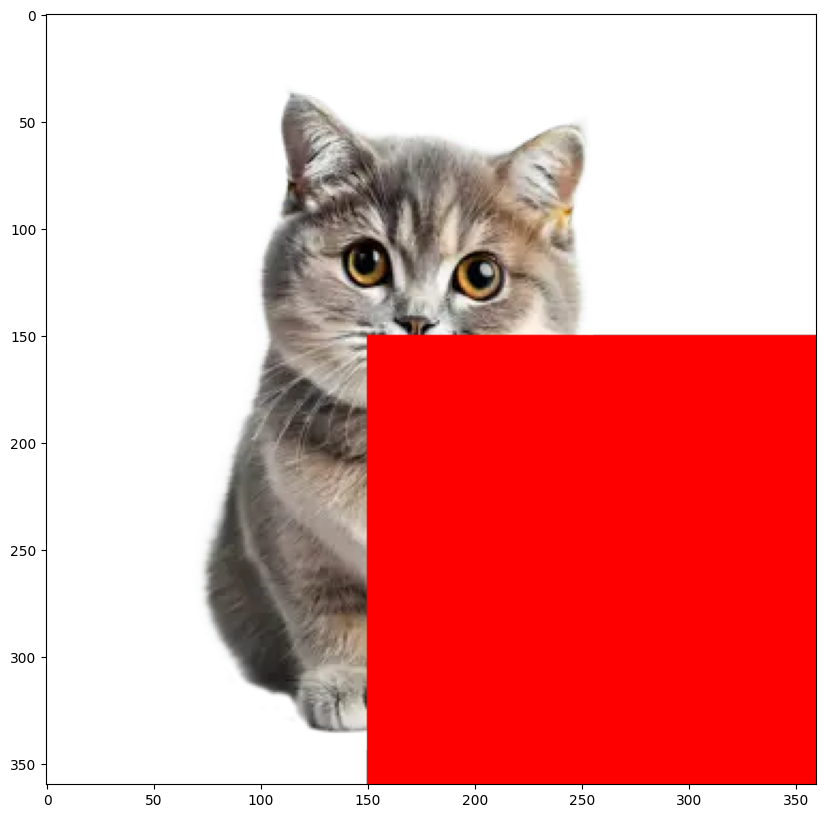

In [33]:
#plotting image
plt.figure(figsize=(10,10))
plt.imshow(image_draw)
plt.show()

In [34]:
#adding overlay text on an image
from PIL import ImageFont
image_fn.text(xy=(0,0), text="box", fill=(0,0,0))

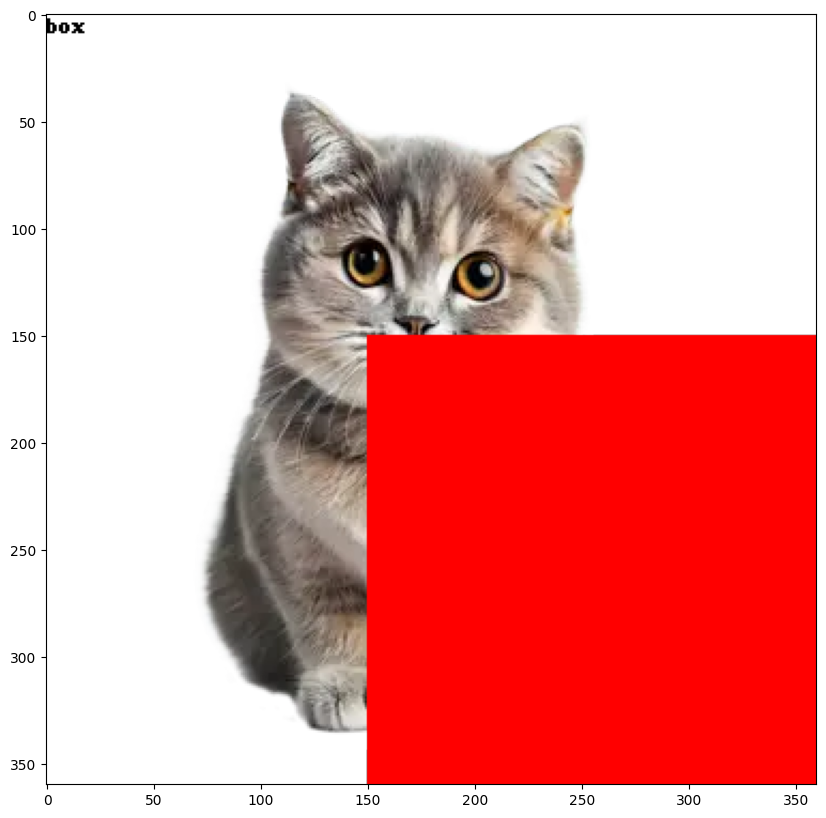

In [35]:
plt.figure(figsize=(10,10))
plt.imshow(image_draw)
plt.show()


In [36]:
image_lenna = Image.open("resources/lenna.png")
array_lenna = np.array(image_lenna)

In [ ]:
array_lenna[upper:lower,left:right,:] = array[upper:lower,left:right,:]
plt.imshow(array_lenna)
plt.show()

In [43]:
# array = array[:,:,:3]  # Keep only the first 3 channels (RGB)
# array_lenna[upper:lower,left:right,:] = array[upper:lower,left:right,:]
# plt.imshow(array_lenna)
# plt.show()
# array_lenna = np.dstack([array_lenna, np.full((array_lenna.shape[0], array_lenna.shape[1]), 255)])  # Add a full alpha channel
# array_lenna[upper:lower,left:right,:] = array[upper:lower,left:right,:]
# plt.imshow(array_lenna)
# plt.show()

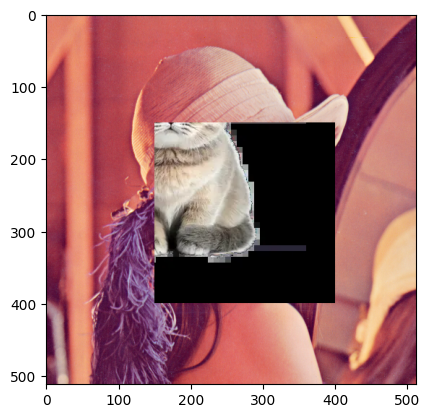

In [44]:
image_lenna.paste(crop_image, box=(left, upper))
plt.imshow(image_lenna)
plt.show()

In [45]:
#copy() can be used
image = Image.open("resources/cat.png")
new_image = Image
copy_image = image.copy()

In [46]:
id(image) == id(copy_image)

False

In [47]:
id(image) == id(copy_image)

False

In [48]:
image_fn = ImageDraw.Draw(im=image)
image_fn.text(xy=(0,0), text="box", fill=(0,0,0))
image_fn.rectangle(xy=shape, fill="red")

TypeError: Image data of dtype object cannot be converted to float

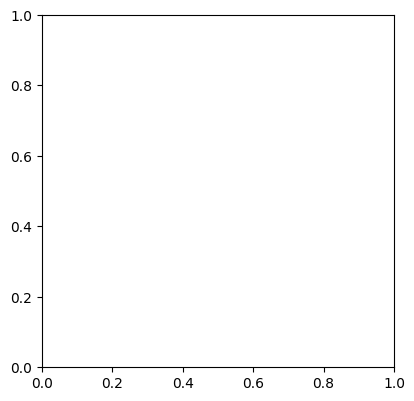

In [50]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(new_image)
plt.subplot(122)
plt.imshow(copy_image)
plt.show()